# Weave Tutorial

**TEMPORARY:** Currently used for debugging.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sinter
import stim
import stimbposd

import weave as wv

In [3]:
# Edit matplotlib parameters
plt.rcParams.update(
    {
        "text.usetex": True,  # WARNING: make false if no TeX compiler installed
        "font.family": "Serif",
        "figure.dpi": 300,
    }
)

In [4]:
tasks = [
    sinter.Task(
        circuit=wv.HypergraphProductCode(
            H1=wv.pcm.repetition(d),
            H2=wv.pcm.repetition(d),
            rounds=d * 3,
            experiment="z_memory",
            noise=wv.NoiseModel(data=noise),
        ).circuit,
        json_metadata={"d": d, "p": noise},
    )
    for d in [3, 5, 7, 9]
    for noise in [0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
]

collected_stats: list[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=tasks,
    decoders=["pymatching"],
    max_shots=100_000,
    max_errors=500,
)

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 

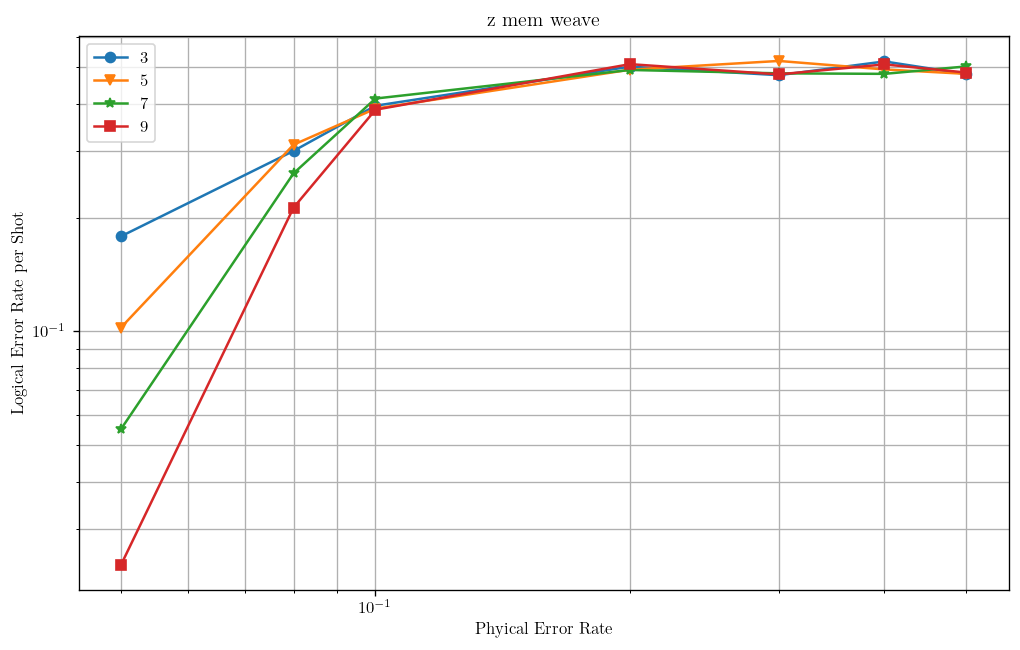

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
    highlight_max_likelihood_factor=1,
)
# ax.set_ylim(1e-4, 1e-0)
# ax.set_xlim(5e-2, 5e-1)
ax.loglog()
ax.set_title("z mem weave")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

In [6]:
delta_1 = 1
delta_2 = 0.3
delta_3 = -0.5

pos_data_rep_3_hamming_7_4 = [
    (0, 4),
    (2, 4),
    (3, 4),
    (5, 4),
    (6, 4),
    (7, 4),
    (9, 4),
    #
    (1, 3 + delta_1),
    (4, 3 + delta_2),
    (8, 3 + delta_3),
    #
    (0, 2),
    (2, 2),
    (3, 2),
    (5, 2),
    (6, 2),
    (7, 2),
    (9, 2),
    #
    (1, 1 + delta_1),
    (4, 1 + delta_2),
    (8, 1 + delta_3),
    #
    (0, 0),
    (2, 0),
    (3, 0),
    (5, 0),
    (6, 0),
    (7, 0),
    (9, 0),
]

pos_z_check_rep_3_hamming_7_4 = [
    (1, 4 + delta_1),
    (4, 4 + delta_2),
    (8, 4 + delta_3),
    #
    (1, 2 + delta_1),
    (4, 2 + delta_2),
    (8, 2 + delta_3),
    #
    (1, 0 + delta_1),
    (4, 0 + delta_2),
    (8, 0 + delta_3),
]

pos_x_check_rep_3_hamming_7_4 = [
    (0, 3),
    (2, 3),
    (3, 3),
    (5, 3),
    (6, 3),
    (7, 3),
    (9, 3),
    #
    (0, 1),
    (2, 1),
    (3, 1),
    (5, 1),
    (6, 1),
    (7, 1),
    (9, 1),
]

pos_rep_3_hamming_7_4 = (
    pos_data_rep_3_hamming_7_4
    + pos_z_check_rep_3_hamming_7_4
    + pos_x_check_rep_3_hamming_7_4
)

In [7]:
hp_code_rep_3_hamming_7_4 = wv.HypergraphProductCode(
    H1=wv.pcm.repetition(3),
    H2=wv.pcm.hamming(7),
    experiment="z_memory",
)

[Z Logical Operators]
Using 4/4 logical operators:
[array([ 0, 10, 20]), array([ 1, 11, 21]), array([ 2, 12, 22]), array([ 3, 13, 23])] 



In [8]:
hp_code_rep_3_hamming_7_4.embed("spring")

[Z Logical Operators]
Using 4/4 logical operators:
[array([ 0, 10, 20]), array([ 1, 11, 21]), array([ 2, 12, 22]), array([ 3, 13, 23])] 



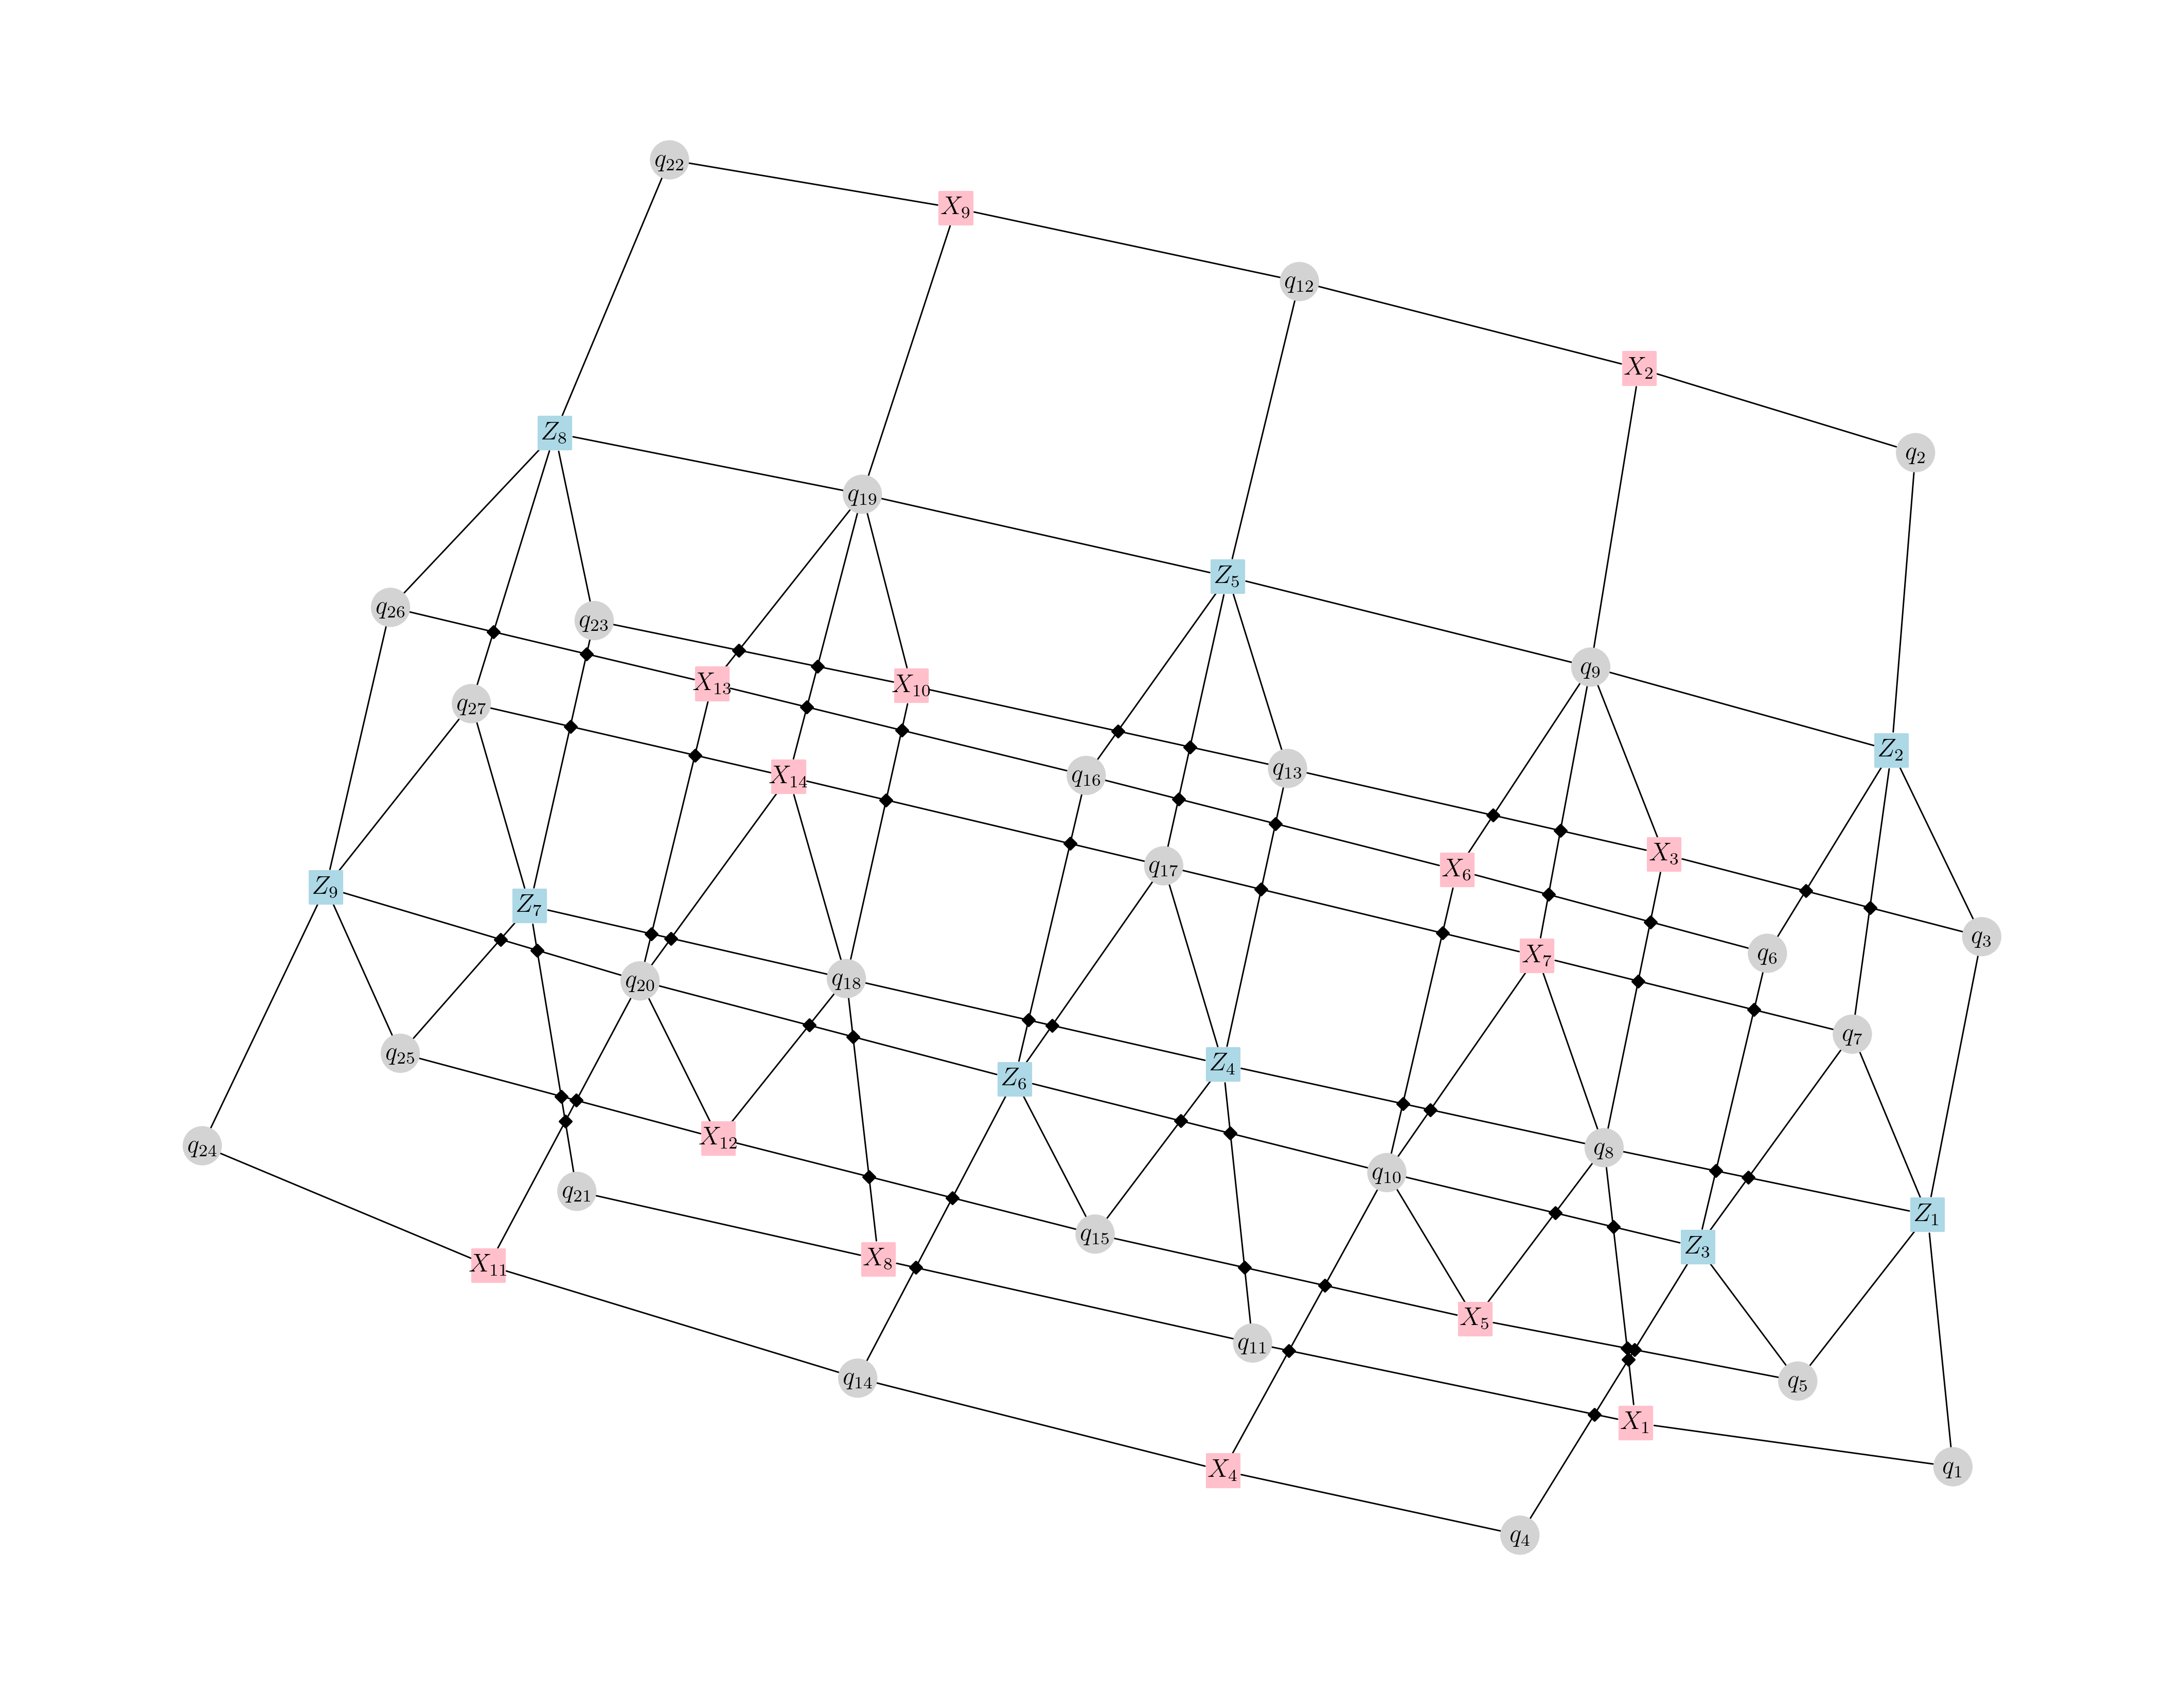

In [9]:
plt.figure(figsize=(18, 14))
hp_code_rep_3_hamming_7_4.draw(with_labels=True)

In [10]:
hp_code_rep_3_hamming_7_4.embed(pos_rep_3_hamming_7_4)

[Z Logical Operators]
Using 4/4 logical operators:
[array([ 0, 10, 20]), array([ 1, 11, 21]), array([ 2, 12, 22]), array([ 3, 13, 23])] 



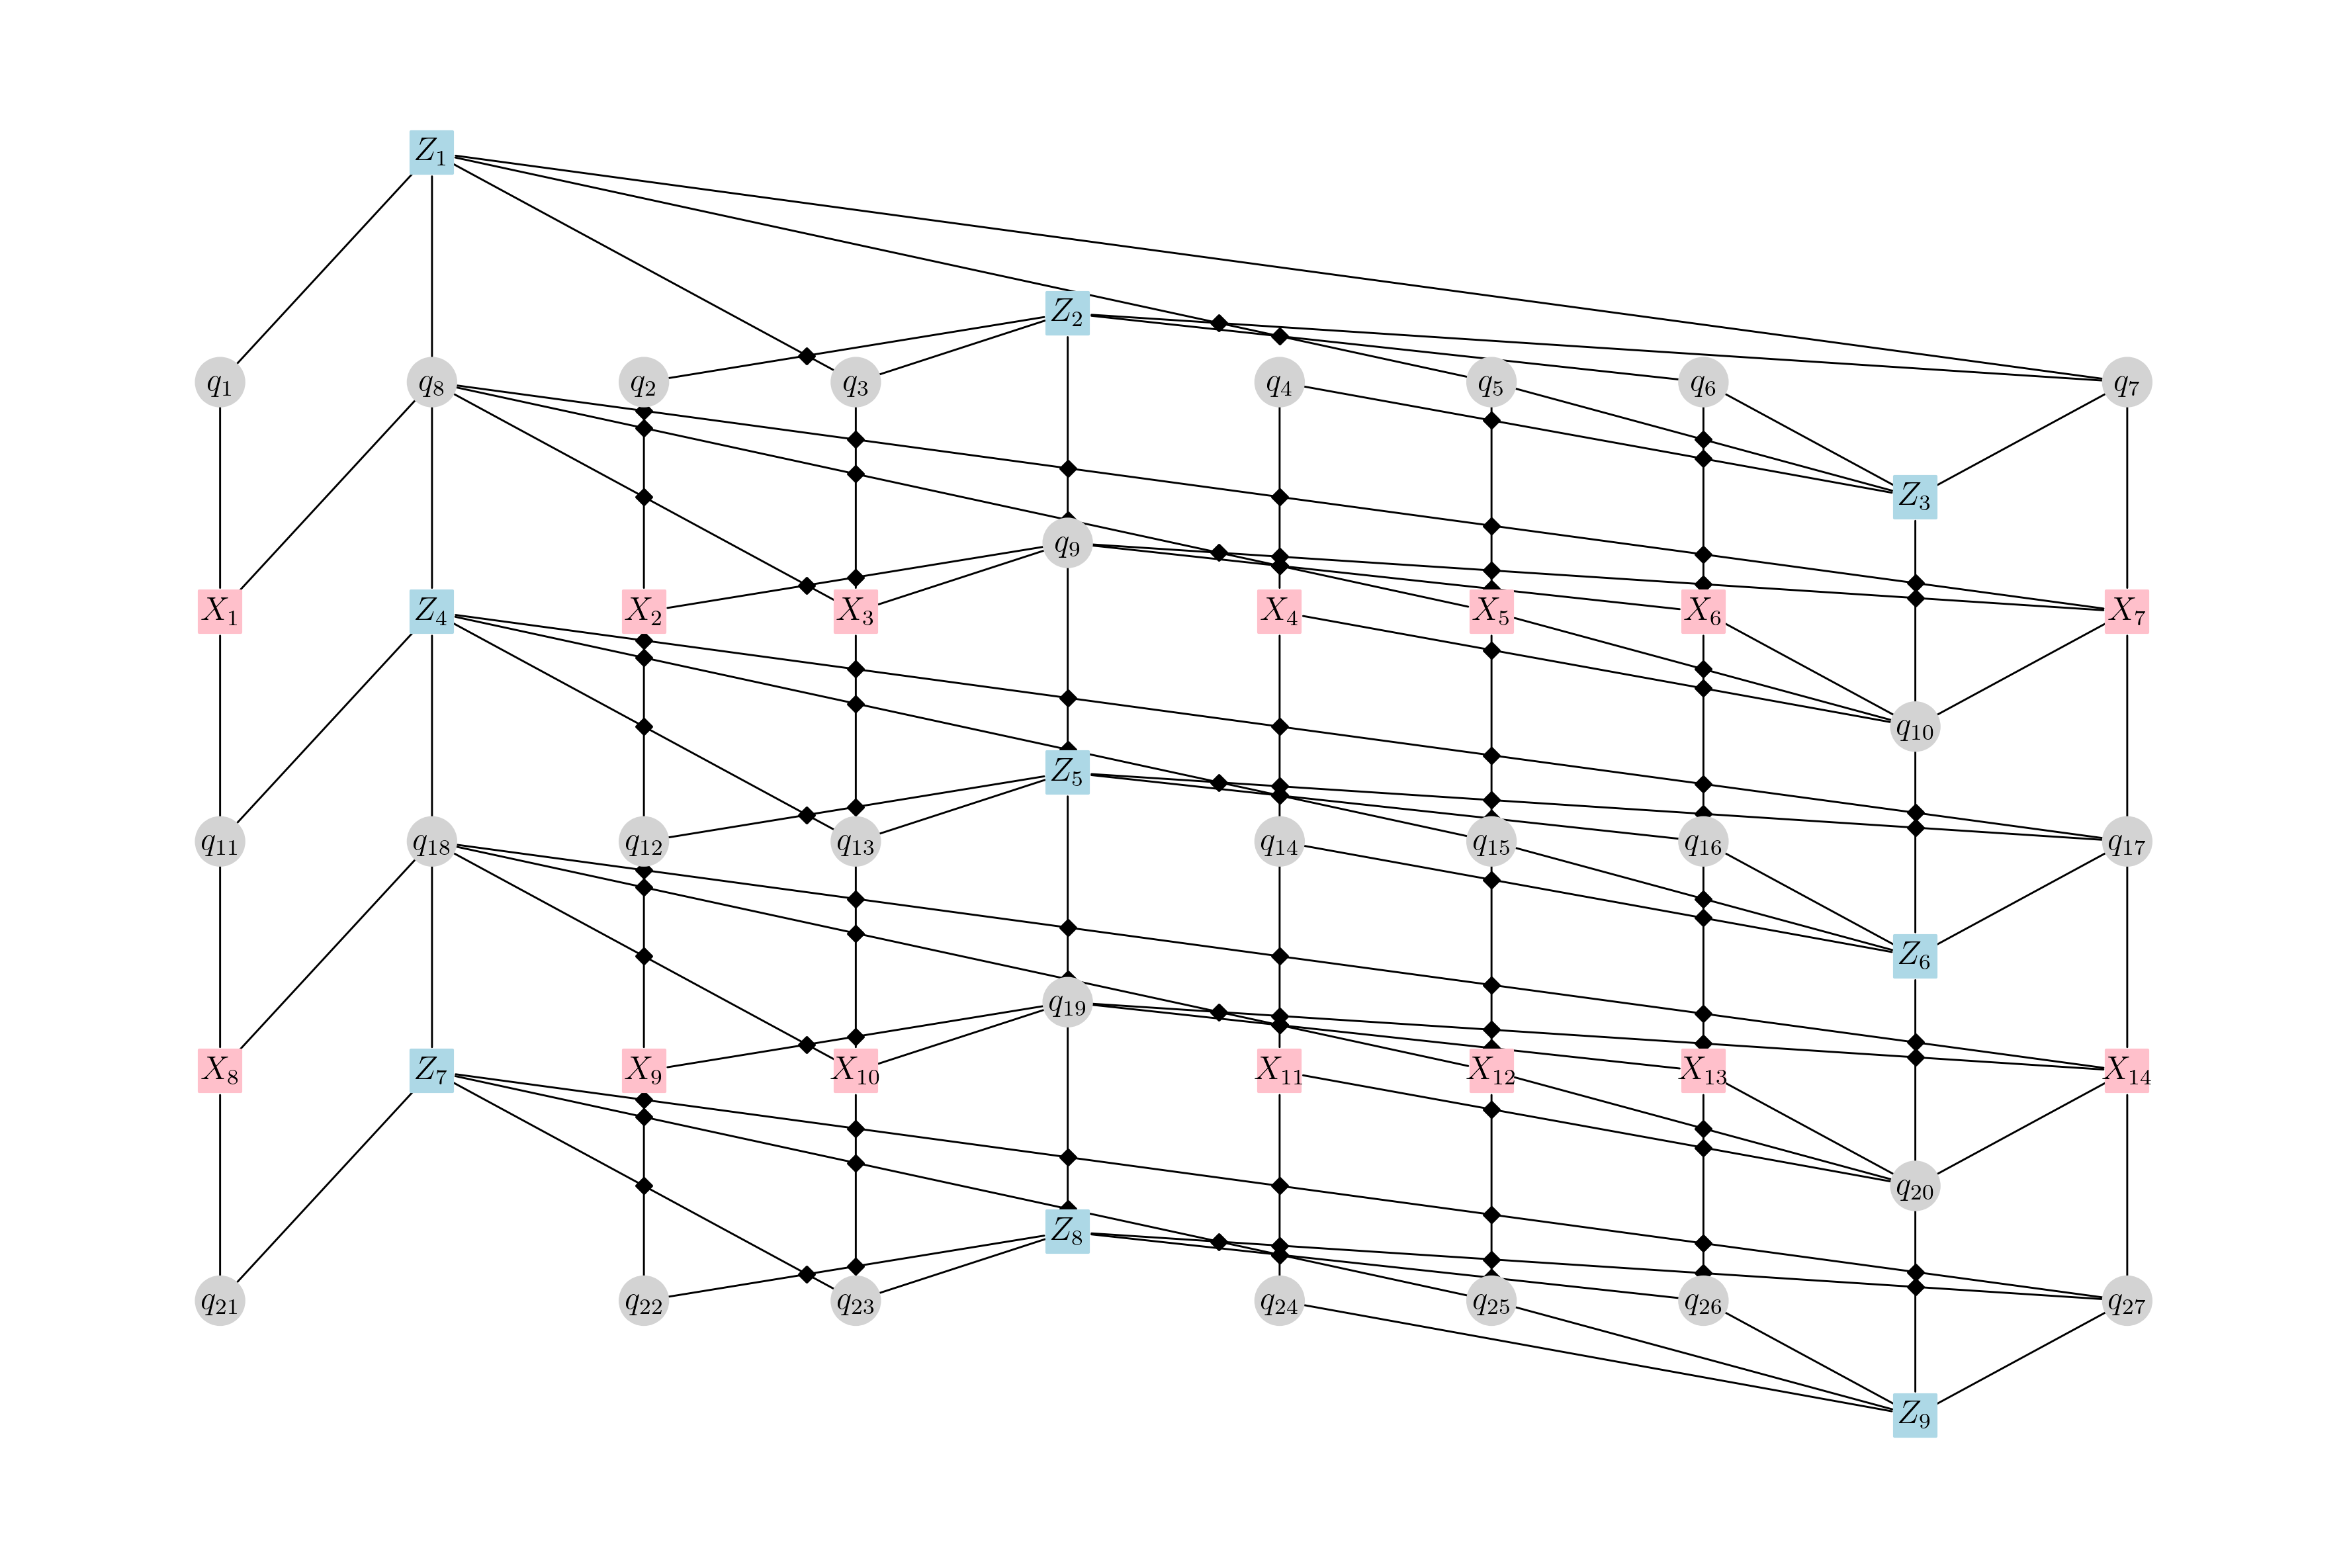

In [11]:
plt.figure(figsize=(15, 10))
hp_code_rep_3_hamming_7_4.draw(with_labels=True)

[Z Logical Operators]
Using 4/4 logical operators:
[array([ 0, 10, 20]), array([ 1, 11, 21]), array([ 2, 12, 22]), array([ 3, 13, 23])] 

[Z Logical Operators]
Using 4/4 logical operators:
[array([ 0, 10, 20]), array([ 1, 11, 21]), array([ 2, 12, 22]), array([ 3, 13, 23])] 



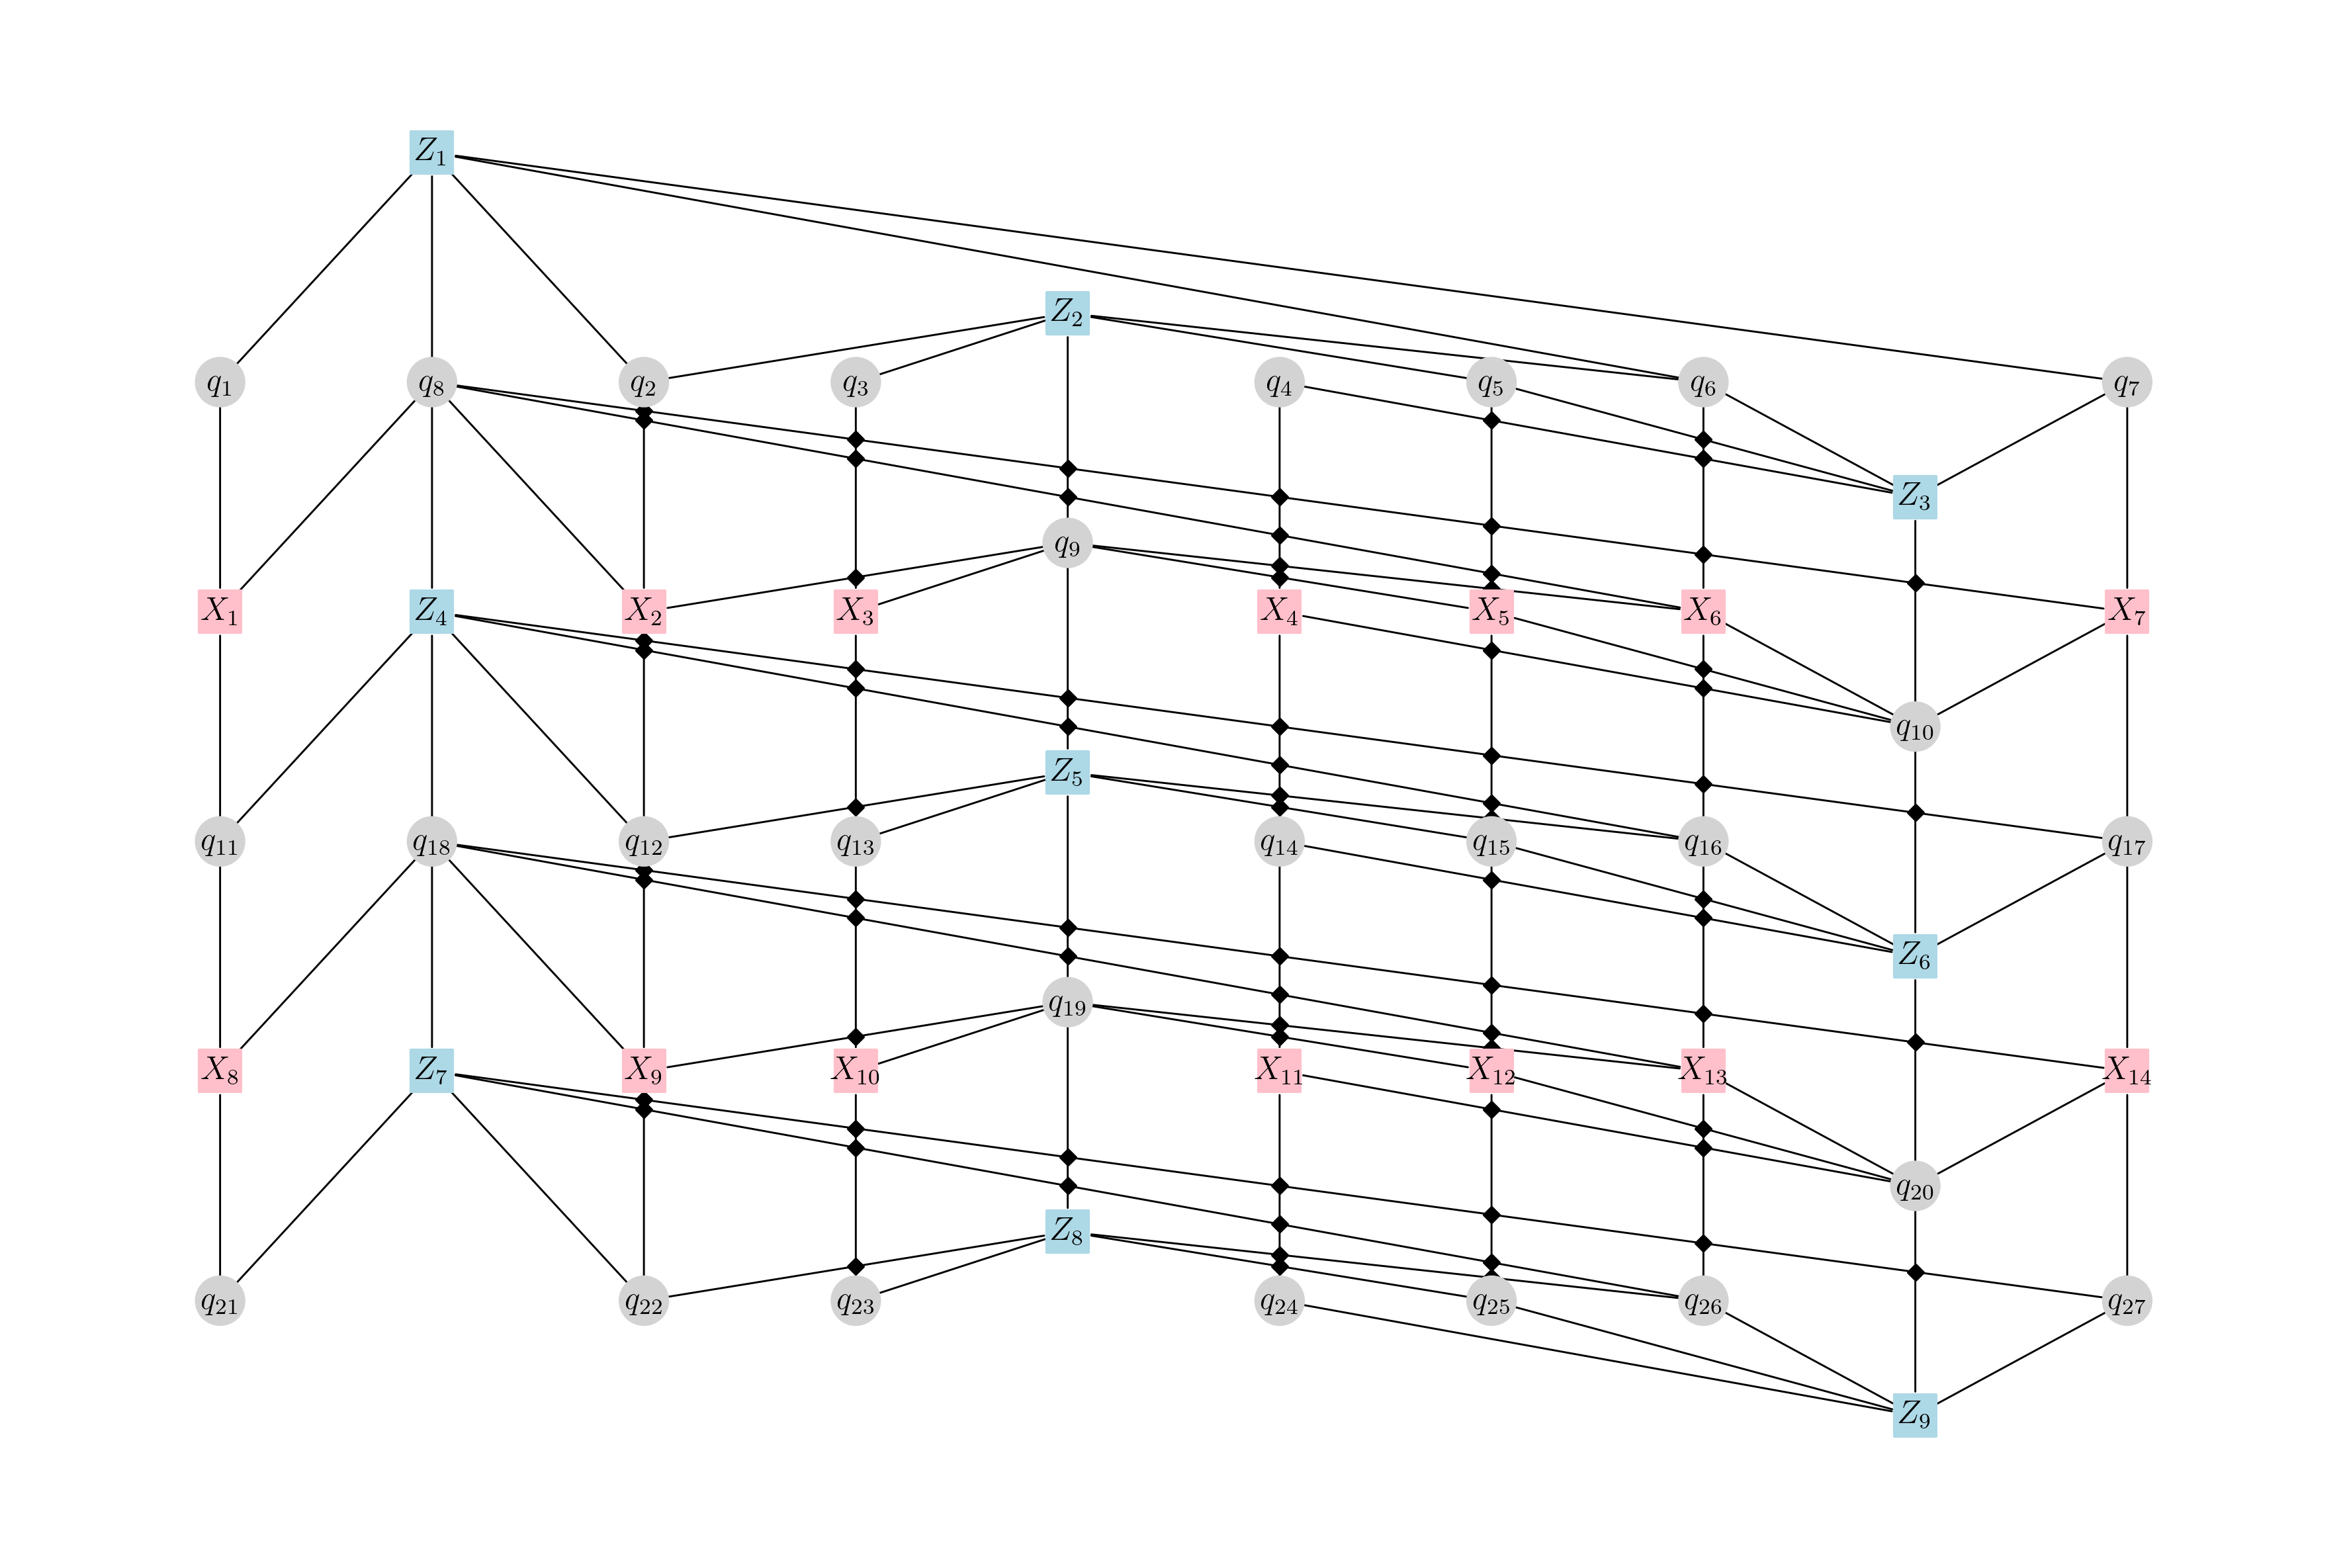

In [17]:
pcm_hamming_7_4_alt = wv.pcm.hamming(7)[:, [0, 2, 1, 3, 5, 6, 4]]

hp_code_rep_3_hamming_7_4_alt = wv.HypergraphProductCode(
    H1=wv.pcm.repetition(3),
    H2=pcm_hamming_7_4_alt,
    experiment="z_memory",
)

hp_code_rep_3_hamming_7_4_alt.embed(pos_rep_3_hamming_7_4)
plt.figure(figsize=(15, 10))
hp_code_rep_3_hamming_7_4_alt.draw(with_labels=True)

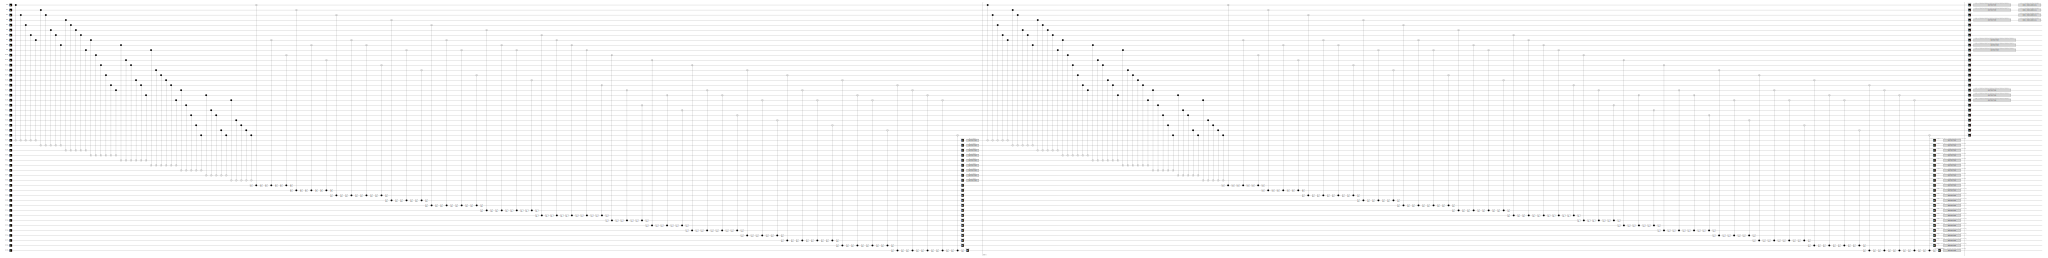

In [18]:
hp_code_rep_3_hamming_7_4.circuit.without_noise().diagram("timeline-svg")